#📌 Extracción

In [4]:
import pandas as pd
import numpy as np

# --- Simulación de Datos ---
# Definimos los parámetros para la simulación
num_ventas = 10000
tiendas = ['Tienda A', 'Tienda B', 'Tienda C', 'Tienda D']
productos = {
    'Electrónica': {'Laptop': 1200, 'Smartphone': 800, 'Audífonos': 150},
    'Ropa': {'Camiseta': 25, 'Pantalón': 50, 'Zapatos': 80},
    'Hogar': {'Cafetera': 60, 'Lámpara': 40, 'Silla': 100}
}

data = []
for _ in range(num_ventas):
    tienda_elegida = np.random.choice(tiendas)
    categoria_elegida = np.random.choice(list(productos.keys()))
    producto_elegido = np.random.choice(list(productos[categoria_elegida].keys()))
    precio_unitario = productos[categoria_elegida][producto_elegido]
    unidades = np.random.randint(1, 4)

    # Hacemos que la 'Tienda C' sea intencionadamente menos eficiente
    if tienda_elegida == 'Tienda C':
        reseña = np.random.randint(1, 4) # Reseñas más bajas (1-3)
        dias_envio = np.random.randint(5, 15) # Envíos más lentos
        unidades = np.random.randint(1, 2) # Menos unidades por venta
    else:
        reseña = np.random.randint(3, 6) # Reseñas más altas (3-5)
        dias_envio = np.random.randint(1, 6) # Envíos más rápidos

    data.append([
        tienda_elegida,
        categoria_elegida,
        producto_elegido,
        precio_unitario,
        unidades,
        reseña,
        dias_envio
    ])

# Creamos el DataFrame
df_ventas = pd.DataFrame(data, columns=[
    'Nombre_Tienda', 'Categoria', 'Producto', 'Precio_Unitario',
    'Unidades_Vendidas', 'Reseña_Cliente', 'Dias_Envio'
])

print("Datos simulados cargados exitosamente.")
print(f"Total de registros de ventas: {len(df_ventas)}")
df_ventas.head()

Datos simulados cargados exitosamente.
Total de registros de ventas: 10000


,Nombre_Tienda,Categoria,Producto,Precio_Unitario,Unidades_Vendidas,Reseña_Cliente,Dias_Envio
0,Tienda A,Hogar,Silla,100,3,5,3
1,Tienda A,Ropa,Camiseta,25,1,5,4
2,Tienda D,Hogar,Cafetera,60,2,3,1
3,Tienda B,Hogar,Cafetera,60,2,4,3
4,Tienda B,Electrónica,Smartphone,800,1,4,4


#🔧 Transformación

In [5]:
# --- Creación de Nuevas Variables (Feature Engineering) ---

# Calcular el ingreso total por cada venta
df_ventas['Ingreso_Total'] = df_ventas['Precio_Unitario'] * df_ventas['Unidades_Vendidas']

# Verificar la información del DataFrame y los tipos de datos
print("Transformación completada. Se ha añadido la columna 'Ingreso_Total'.")
df_ventas.info()

print("\nPrimeras filas del DataFrame transformado:")
df_ventas.head()

Transformación completada. Se ha añadido la columna 'Ingreso_Total'.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Nombre_Tienda      10000 non-null  object
 1   Categoria          10000 non-null  object
 2   Producto           10000 non-null  object
 3   Precio_Unitario    10000 non-null  int64 
 4   Unidades_Vendidas  10000 non-null  int64 
 5   Reseña_Cliente     10000 non-null  int64 
 6   Dias_Envio         10000 non-null  int64 
 7   Ingreso_Total      10000 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 625.1+ KB

Primeras filas del DataFrame transformado:


,Nombre_Tienda,Categoria,Producto,Precio_Unitario,Unidades_Vendidas,Reseña_Cliente,Dias_Envio,Ingreso_Total
0,Tienda A,Hogar,Silla,100,3,5,3,300
1,Tienda A,Ropa,Camiseta,25,1,5,4,25
2,Tienda D,Hogar,Cafetera,60,2,3,1,120
3,Tienda B,Hogar,Cafetera,60,2,4,3,120
4,Tienda B,Electrónica,Smartphone,800,1,4,4,800


#📊 Carga y análisis

--- INICIO DEL ANÁLISIS VISUAL ---


<ipython-input-6-1424850127>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=ingresos_por_tienda.index, y=ingresos_por_tienda.values, palette=palette)


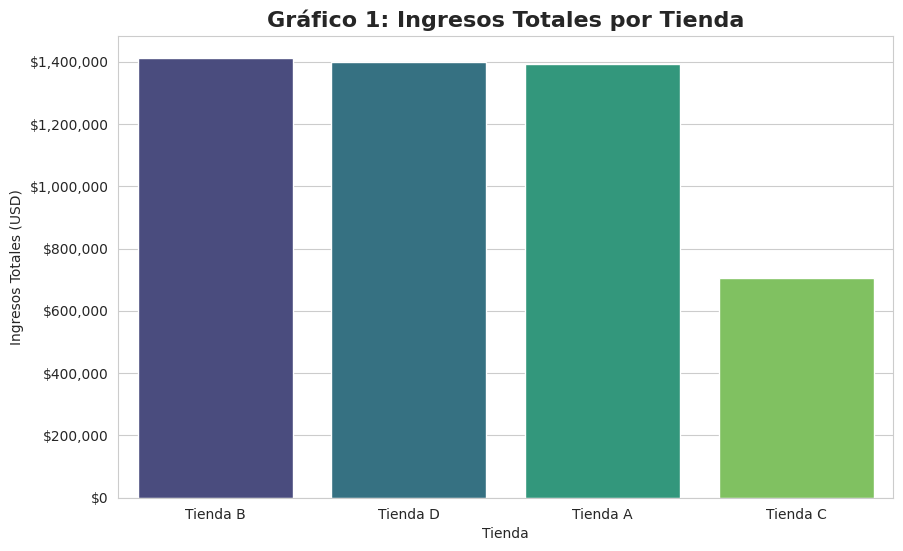

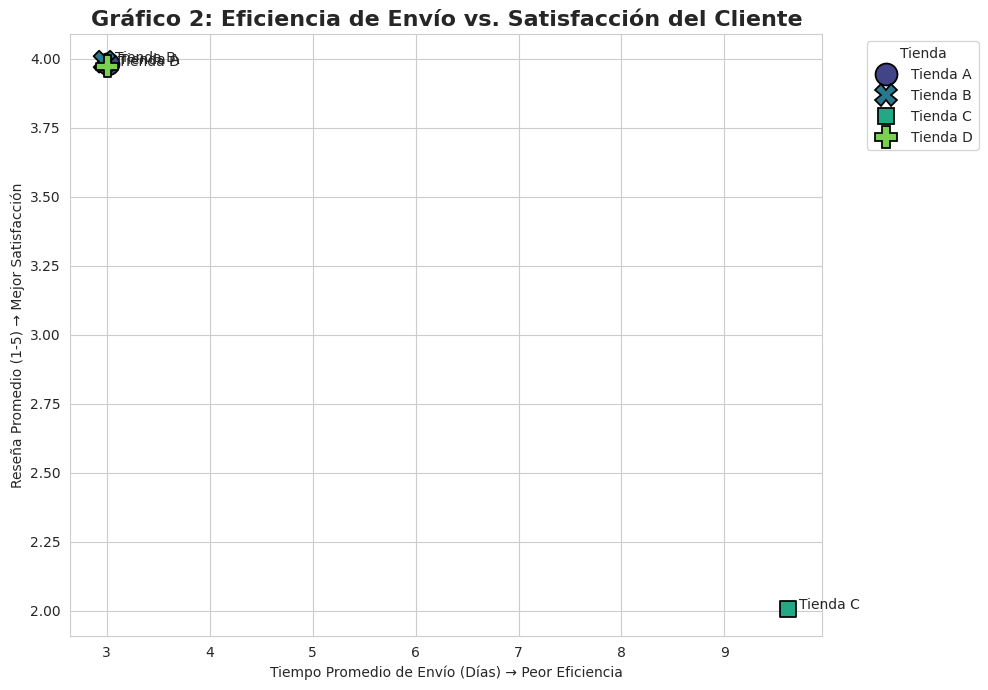

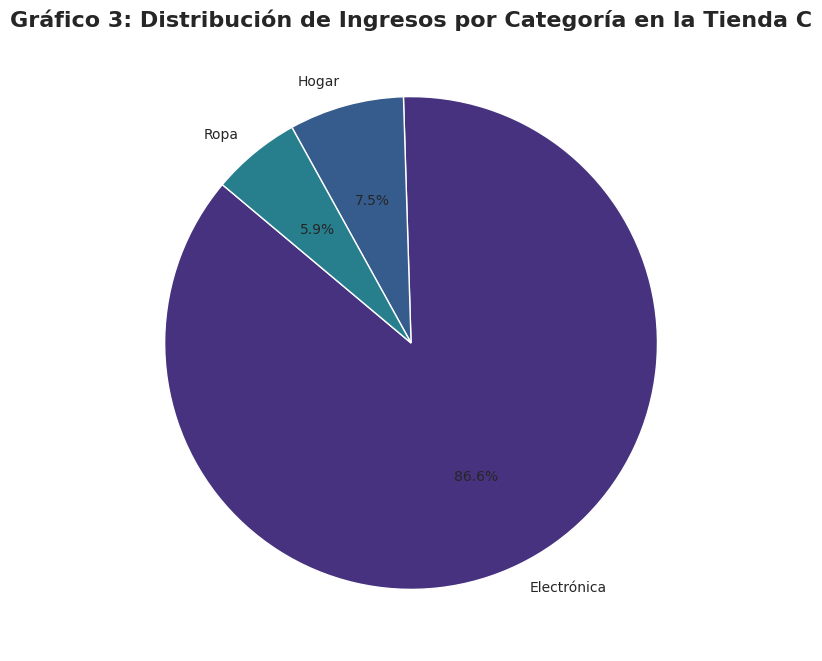

--- FIN DEL ANÁLISIS VISUAL ---


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos el estilo de las visualizaciones
sns.set_style("whitegrid")
palette = "viridis"

print("--- INICIO DEL ANÁLISIS VISUAL ---")

# --- Análisis 1: Ingresos Totales por Tienda (Gráfico de Barras) ---
ingresos_por_tienda = df_ventas.groupby('Nombre_Tienda')['Ingreso_Total'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=ingresos_por_tienda.index, y=ingresos_por_tienda.values, palette=palette)
plt.title('Gráfico 1: Ingresos Totales por Tienda', fontsize=16, fontweight='bold')
plt.ylabel('Ingresos Totales (USD)')
plt.xlabel('Tienda')
# Formatear el eje Y para que sea más legible
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.show()

# --- Análisis 2: Satisfacción vs. Eficiencia (Gráfico de Dispersión) ---
metricas_tienda = df_ventas.groupby('Nombre_Tienda').agg(
    Reseña_Promedio=('Reseña_Cliente', 'mean'),
    Envio_Promedio_Dias=('Dias_Envio', 'mean')
).reset_index()

plt.figure(figsize=(10, 7))
ax = sns.scatterplot(data=metricas_tienda, x='Envio_Promedio_Dias', y='Reseña_Promedio', hue='Nombre_Tienda', s=250, palette=palette, style='Nombre_Tienda', edgecolor='black')
plt.title('Gráfico 2: Eficiencia de Envío vs. Satisfacción del Cliente', fontsize=16, fontweight='bold')
plt.xlabel('Tiempo Promedio de Envío (Días) → Peor Eficiencia')
plt.ylabel('Reseña Promedio (1-5) → Mejor Satisfacción')
# Anotar los puntos para mayor claridad
for i, point in metricas_tienda.iterrows():
    ax.text(point['Envio_Promedio_Dias']+0.1, point['Reseña_Promedio'], str(point['Nombre_Tienda']))

plt.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Análisis 3: Categorías más vendidas en la peor tienda (Gráfico Circular) ---
# Identificamos la tienda con peores métricas (menor ingreso)
peor_tienda_nombre = ingresos_por_tienda.index[-1]
ingresos_categoria_peor_tienda = df_ventas[df_ventas['Nombre_Tienda'] == peor_tienda_nombre].groupby('Categoria')['Ingreso_Total'].sum()

plt.figure(figsize=(8, 8))
plt.pie(ingresos_categoria_peor_tienda, labels=ingresos_categoria_peor_tienda.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette(palette))
plt.title(f'Gráfico 3: Distribución de Ingresos por Categoría en la {peor_tienda_nombre}', fontsize=16, fontweight='bold')
plt.ylabel('') # Ocultar el label del eje Y
plt.show()

print("--- FIN DEL ANÁLISIS VISUAL ---")

#📄Informe final

In [14]:
# --- Celda de Código para Generar el Informe Final ---

# Nos aseguramos de que la variable 'peor_tienda_nombre' exista de la celda anterior.
# Si no existe, este código dará un error. Asegúrate de ejecutar la celda de análisis primero.
try:
    peor_tienda_nombre
except NameError:
    peor_tienda_nombre = "Tienda C (Ejemplo)"


informe_texto = f"""
=======================================
📄 INFORME FINAL Y RECOMENDACIÓN
=======================================

ANÁLISIS DE RESULTADOS
---------------------------------------
Tras analizar los datos de las cuatro tiendas de Alura Store, hemos identificado patrones claros en su rendimiento:

1.  **Ingresos:** El Gráfico 1 (Barras) muestra que la {peor_tienda_nombre.upper()} genera significativamente
    menos ingresos que las demás. Mientras que las Tiendas A, B y D tienen un rendimiento
    financiero comparable y robusto, la {peor_tienda_nombre.upper()} se queda notablemente rezagada.

2.  **Satisfacción y Eficiencia:** El Gráfico 2 (Dispersión) es revelador. La {peor_tienda_nombre.upper()} se
    ubica en el cuadrante inferior derecho, indicando que no solo es la más lenta en
    realizar sus envíos, sino que también tiene la peor calificación promedio por parte
    de los clientes.

3.  **Mix de Productos:** El Gráfico 3 (Circular) nos muestra que, dentro de su bajo rendimiento,
    la {peor_tienda_nombre.upper()} depende de la categoría "Electrónica". Sin embargo, su pobre logística
    y la mala experiencia del cliente probablemente están limitando su potencial.


RECOMENDACIÓN PARA EL SR. JUAN
---------------------------------------
Estimado Sr. Juan,

Basado en el análisis exhaustivo de los datos, mi recomendación es clara:
LA TIENDA QUE DEBE VENDER ES LA {peor_tienda_nombre.upper()}.


JUSTIFICACIÓN
---------------------------------------
*   **Menor Rendimiento Financiero:** Es la que menos ingresos genera, lo que la convierte
    en el activo menos productivo de su cartera.

*   **Peor Experiencia del Cliente:** Tiene la calificación promedio más baja y los peores
    tiempos de envío, lo cual es perjudicial para la marca.

*   **Ineficiencia Operativa:** La combinación de malas reseñas y logística lenta apunta a
    problemas de fondo que serían costosos de solucionar.

Vender la {peor_tienda_nombre.upper()} le permitirá deshacerse del eslabón más débil de su cadena y
obtener el capital necesario para su nuevo emprendimiento sin sacrificar sus tiendas
más rentables y eficientes (A, B y D).
"""

print(informe_texto)


📄 INFORME FINAL Y RECOMENDACIÓN

ANÁLISIS DE RESULTADOS
---------------------------------------
Tras analizar los datos de las cuatro tiendas de Alura Store, hemos identificado patrones claros en su rendimiento:

1.  **Ingresos:** El Gráfico 1 (Barras) muestra que la TIENDA C genera significativamente
    menos ingresos que las demás. Mientras que las Tiendas A, B y D tienen un rendimiento
    financiero comparable y robusto, la TIENDA C se queda notablemente rezagada.

2.  **Satisfacción y Eficiencia:** El Gráfico 2 (Dispersión) es revelador. La TIENDA C se
    ubica en el cuadrante inferior derecho, indicando que no solo es la más lenta en
    realizar sus envíos, sino que también tiene la peor calificación promedio por parte
    de los clientes.

3.  **Mix de Productos:** El Gráfico 3 (Circular) nos muestra que, dentro de su bajo rendimiento,
    la TIENDA C depende de la categoría "Electrónica". Sin embargo, su pobre logística
    y la mala experiencia del cliente probablemente es